# Get Tweets Related to any topic and user 
### Import the libraries and other prerequisites:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import networkx as nx                # networkx library for bigram visualization
import requests as rq
from bs4 import BeautifulSoup as bs  # In the case if we want to use obtain the ouput in XML format
import json                          # In the case if we want to use obtain the ouput in JSON format
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

def print_json(r):
    parsed_json = json.loads(r)
    print(json.dumps(parsed_json, indent = 4, sort_keys=False))

### Examples to illustrate how to parse the information by Using Twitter Analysis API which internally uses DRAE API (e.g. translation and obtain the definitions of the words)
#### This requires to run in advance the server program `Twitter_Analysis_API.py`, you may also consider access the data through browser!

In [ ]:
### Parse the information of a treding topic (e.g. COVID):
headers = {'Accept-Language':'en' }                      # Specify the language, only English (en) ir Spanish (es)    
params = { 'N':'500', 'M':'20', 'D':'3'}                 # Specify that we want to have N tweets, extract M most frequent words with three definitions for each word
topic = 'COVID'
res = rq.get(f'http://127.0.0.1:8080/api/topic/{topic}', # Extract the information related to COVID (a topic)
             headers=headers, params=params).content
print_json(res)   # Visualize the output

In [ ]:
### Parse the information of a particular user in Twitter (e.g. JoeBiden):
headers = {'Accept-Language':'en' }
params = { 'N':'500', 'M':'20', 'D':'3'}
res = rq.get('http://127.0.0.1:8080/api/user/JoeBiden',headers=headers, params=params).content
print_json(res)   # Visualize the output

# In the following sections we provided some example 
### Visualization of the M most common word and Bigrams by using bar chart

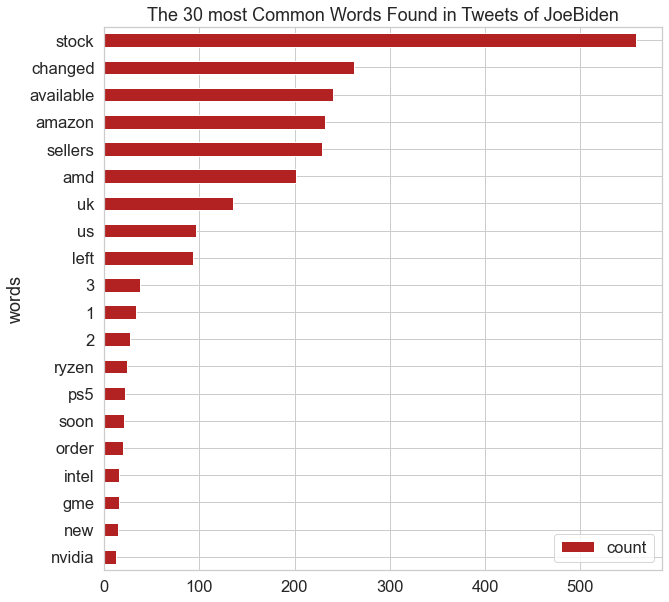

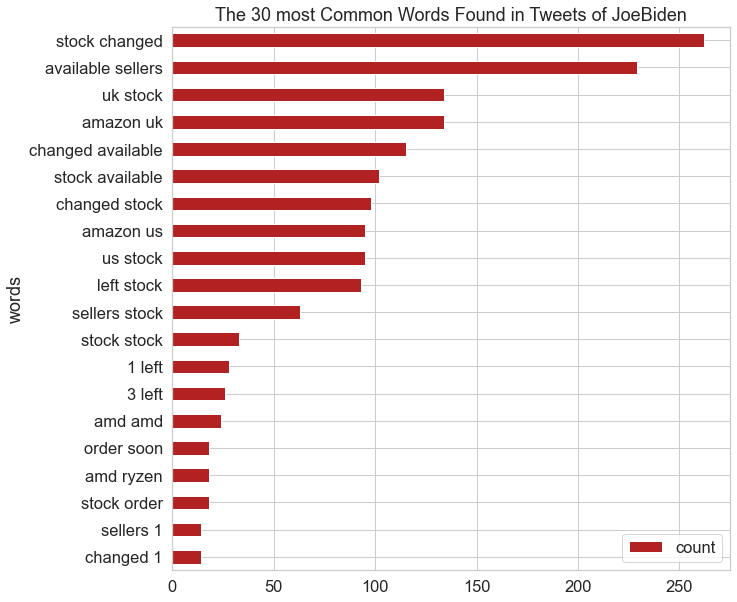

In [109]:
# Split the Words frequencies and Bigrams frequencies into two dictionaries
resul = json.loads(res)
resul1, resul2 = resul['words'], resul['bigrams']
resul1 = {key:value['recurrence'] for key, value in resul1.items()}

# Establish a Dataframe and visualize the M most common words.
resul1_aux = [(key, value) for key, value in resul1.items()]
Most_Common_Words = pd.DataFrame(resul1_aux,
                                 columns=['words', 'count'])

# Plot the data using bar chart
fig, ax = plt.subplots(figsize=(10, 10))
Most_Common_Words.sort_values(by='count').plot.barh(x='words',
                            y='count',
                            ax=ax,
                            color="firebrick")

ax.set_title(f"The {M} most Common Words Found in Tweets of {userID}")
a = plt.show()
fig.savefig('Most_common_words.png', dpi=300)    # Save the image with high dpi

resul2_aux = [(key, value) for key, value in resul2.items()]
Most_Common_Words = pd.DataFrame(resul2_aux,
                                 columns=['words', 'count'])

# Plot the data using bar chart
fig, ax = plt.subplots(figsize=(10, 10))
Most_Common_Words.sort_values(by='count').plot.barh(x='words',
                            y='count',
                            ax=ax,
                            color="firebrick")

ax.set_title(f"The {M} most Common Words Found in Tweets of {userID}")
a = plt.show()
fig.savefig('Most_common_Bigrams.png', dpi=300)    # Save the image with high dpi

## Visualization of Bigram study by using network plot

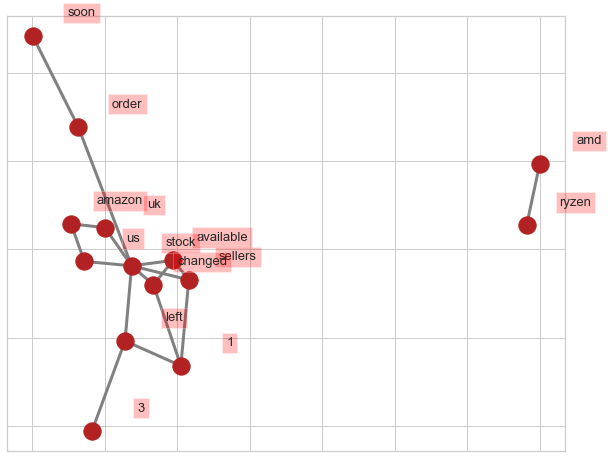

In [110]:
bigram_counts = []
for w, count in resul2.items():
    bigram_counts.append((tuple(w.split()), count))

bigram_df = pd.DataFrame(bigram_counts,
                             columns=['bigram', 'count'])

data = bigram_df.set_index('bigram').T.to_dict('records')

# establish a Network Plot 
Graph = nx.Graph()

# Create edges between vertices
for key, value in data[0].items():
    Graph.add_edge(key[0], key[1], weight=(value * 10))

fig, ax = plt.subplots(figsize=(10,8))
position = nx.spring_layout(Graph, k=2)

# Plot networks
nx.draw_networkx(Graph, position,
                 font_size=16,
                 width=3,
                 edge_color='gray',
                 node_color='firebrick',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in position.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()
fig.savefig('Bigrams_Network.png', dpi=300)    # Save the image